### Parte 1: Primeiros passos - Carregar pacotes

1. Instale todos os pacotes através da biblioteca **FinRL**
2. Instale a biblioteca **pyportfolioopt** para estudo de Portifólios
3. Instale a biblioteca **uniqed** para a remoção de Outliers de Preço

In [ ]:
!pip install wrds
!pip install swig
!pip install yfinance
!pip install uniqed
!pip install -q condacolab
import condacolab
condacolab.install()
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.22
    Uninstalling SQLAlchemy-2.0.22:
      Successfully uninstalled SQLAlchemy-2.0.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.49 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-k3u

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from scipy.stats import norm, zscore
import time
import os
from uniqed.runners.tof_run import detect_outlier
from finrl.main import check_and_make_directories
import datetime
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import yfinance as yf

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

import sys
sys.path.append("../FinRL-Library")

import itertools

sns.set_style("darkgrid")

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

#### Lendo os valores da coluna "Ticker" da nossa planilha

- Após leitura, os tickers coletados são utilizados para executar a função .download()

- Dados OHLCV de cada Ticker são coletados

In [2]:
tickers = ['ETD','PAYX','NVR','INTU','ORLY','BCE','DHR','EW','IPAR','AMAT','DSGX','CDNS',
           'SNY', 'CSGP', 'SWKS', 'LRCX', 'TSCO','MSCI', 'FTNT', 'NTAP', 'LMAT', 'ISRG', 'DOX', 'EPAM', 'YELP',
           'CHKP','QLYS','OLED', 'USNA', 'GRMN', 'TXN', 'GNTX', 'HVT', 'VRSN', 'SNPS', 'SSD', 'META', 'WSM',
           'CPRT','NVDA', 'INCY', 'ACN', 'DLB', 'TREX', 'OFLX', 'ALGN', 'AMGN', 'SPSC', 'GOOGL', 'NRC', 'CP',
           'CGNX', 'BKE', 'FAST', 'SIMO', 'JKHY', 'ATRI', 'SNA', 'KLAC', 'MPWR', 'LZB', 'CHT', 'AKAM', 'MANH',
           'ANSS','NVO', 'SAP', 'NHC', 'ADBE', 'GMED', 'SPGI', 'MTD', 'ROL', 'FFIV', 'RHI', 'MNST', 'LULU',
           'FIZZ', 'CRM', 'DHI', 'FLT', 'REGN', 'TSM', 'CTSH', 'AAPL']

def OHLCV(list_tickers, start, end):
    ohlcv = {}

    for t in list_tickers:
        time.sleep(0.5)
        try:
            data = yf.download(t, start=start, end=end, interval="1d", repair=True).dropna()
            if not data.empty:
                ohlcv[t] = data
        except:
            pass
    return ohlcv

ohlcv_dict = OHLCV(tickers,"2017-01-01","2022-12-30")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Dado Histórico: Adj Close


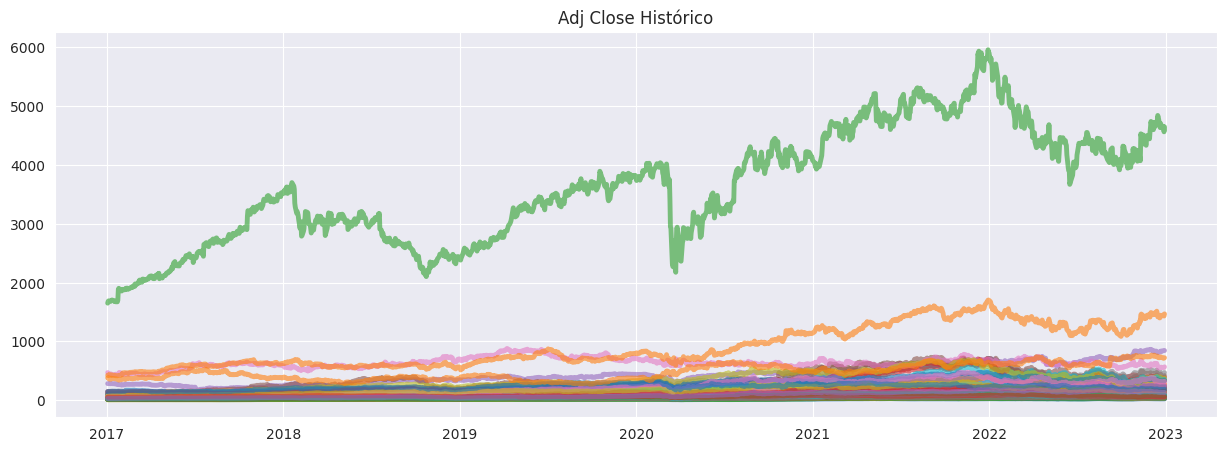

In [3]:
warnings.filterwarnings("ignore")

def historical_values(source,index):

    ativos = [x for x in source.keys()]
    vol_med =[]

    if index == "Volume":
        if len(tickers)<17:
            plt.rcParams.update({"font.size": 19})
        else:
            plt.rcParams.update({"font.size": 18})

        plt.figure(figsize=(15, 5))
        print(f"Dado Histórico: {index} Médio")
        for t in source.keys():
            vol_med.append(source[t][index].mean() / 100)
        sorted_vol_med, sorted_ativos = zip(*sorted(zip(vol_med, ativos)))
        plt.bar(sorted_ativos, sorted_vol_med)
        plt.title(f"{index} Histórico Médio")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Dado Histórico: {index}")
        plt.figure(figsize=(15,5))
        for t in source.keys():
            plt.plot(source[t][index],alpha=0.6,lw=3.5)
            #plt.legend([x for x in source.keys()],loc='upper left',framealpha=0.55)
        plt.title(f"{index} Histórico")
        plt.show()

%matplotlib inline
historical_values(ohlcv_dict,"Adj Close")

### Parte 2: Baixar Dados

In [4]:
warnings.filterwarnings("ignore")

TRAIN_START_DATE = '2017-01-01'
TRAIN_END_DATE = '2019-01-01'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2022-12-30'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = [x for x in ohlcv_dict.keys()]).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2017-01-03,28.950001,29.082500,28.690001,27.059305,115127600,AAPL,1
1,2017-01-03,117.379997,117.809998,115.820000,104.547798,2351600,ACN,1
2,2017-01-03,103.430000,104.029999,102.809998,103.480003,2277400,ADBE,1
3,2017-01-03,67.269997,68.370003,67.110001,67.570000,1077400,AKAM,1
4,2017-01-03,96.489998,98.330002,95.800003,96.959999,816700,ALGN,1


In [6]:
df.shape

(128265, 8)

In [7]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2017-01-03,28.950001,29.082500,28.690001,27.059305,115127600,AAPL,1
1,2017-01-03,117.379997,117.809998,115.820000,104.547798,2351600,ACN,1
2,2017-01-03,103.430000,104.029999,102.809998,103.480003,2277400,ADBE,1
3,2017-01-03,67.269997,68.370003,67.110001,67.570000,1077400,AKAM,1
4,2017-01-03,96.489998,98.330002,95.800003,96.959999,816700,ALGN,1


### Parte 3: Pré-processar dados

In [8]:
warnings.filterwarnings("ignore")

fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=True,
                     user_defined_feature = False)

processada = fe.preprocess_data(df)
processada = processada.copy()
processada = processada.fillna(0)
processada = processada.replace(np.inf,0)
processada.head()

Successfully added technical indicators
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1508, 8)
Successfully added vix
Successfully added turbulence index


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2017-01-03,28.950001,29.082500,28.690001,27.059305,115127600,AAPL,1,0.0,27.08699,27.001337,0.0,66.666667,100.0,27.059305,27.059305,12.85,0.0
1,2017-01-03,117.379997,117.809998,115.820000,104.547798,2351600,ACN,1,0.0,27.08699,27.001337,0.0,66.666667,100.0,104.547798,104.547798,12.85,0.0
2,2017-01-03,103.430000,104.029999,102.809998,103.480003,2277400,ADBE,1,0.0,27.08699,27.001337,0.0,66.666667,100.0,103.480003,103.480003,12.85,0.0
3,2017-01-03,67.269997,68.370003,67.110001,67.570000,1077400,AKAM,1,0.0,27.08699,27.001337,0.0,66.666667,100.0,67.570000,67.570000,12.85,0.0
4,2017-01-03,96.489998,98.330002,95.800003,96.959999,816700,ALGN,1,0.0,27.08699,27.001337,0.0,66.666667,100.0,96.959999,96.959999,12.85,0.0


In [9]:
lista_ticker = processada["tic"].unique().tolist()
lista_data = list(pd.date_range(processada['date'].min(),processada['date'].max()).astype(str))
combinacao = list(itertools.product(lista_data,lista_ticker))

processada_full = pd.DataFrame(combinacao,columns=["date","tic"]).merge(processada,on=["date","tic"],how="left")
processada_full = processada_full[processada_full['date'].isin(processada['date'])]
processada_full = processada_full.sort_values(['date','tic'])

processada_full = processada_full.fillna(0)
mvo_df = processada_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]
processada_full.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2017-01-03,AAPL,28.950001,29.082500,28.690001,27.059305,115127600.0,1.0,0.0,27.08699,27.001337,0.0,66.666667,100.0,27.059305,27.059305,12.85,0.0
1,2017-01-03,ACN,117.379997,117.809998,115.820000,104.547798,2351600.0,1.0,0.0,27.08699,27.001337,0.0,66.666667,100.0,104.547798,104.547798,12.85,0.0
2,2017-01-03,ADBE,103.430000,104.029999,102.809998,103.480003,2277400.0,1.0,0.0,27.08699,27.001337,0.0,66.666667,100.0,103.480003,103.480003,12.85,0.0
3,2017-01-03,AKAM,67.269997,68.370003,67.110001,67.570000,1077400.0,1.0,0.0,27.08699,27.001337,0.0,66.666667,100.0,67.570000,67.570000,12.85,0.0
4,2017-01-03,ALGN,96.489998,98.330002,95.800003,96.959999,816700.0,1.0,0.0,27.08699,27.001337,0.0,66.666667,100.0,96.959999,96.959999,12.85,0.0


In [10]:
train = data_split(processada_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processada_full, TRADE_START_DATE,TRADE_END_DATE)
train_comprimento = len(train)
trade_comprimento = len(trade)
print(f"O tamanho do conjunto de treino é: {train_comprimento}")
print(f"O tamanho do conjunto de trade é: {trade_comprimento}")

O tamanho do conjunto de treino é: 42670
O tamanho do conjunto de trade é: 85510


### Parte 4: Design do Ambiente

In [11]:
ativo_dimensao = len(train.tic.unique())
espaco_acao = 1 + 2*ativo_dimensao + len(INDICATORS)*ativo_dimensao
print(f"Dimensão de ativos: {ativo_dimensao}, Espaço de Ação: {espaco_acao}")

Dimensão de ativos: 85, Espaço de Ação: 851


In [12]:
buy_cost_list = sell_cost_list = [0.001] * ativo_dimensao
num_acoes = [0] * ativo_dimensao

env_kwargs = {
    "hmax": 100,
    "initial_amount": int(input("Insira o valor inicial: ")),
    "num_stock_shares": num_acoes,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": espaco_acao,
    "stock_dim": ativo_dimensao,
    "tech_indicator_list": INDICATORS,
    "action_space": ativo_dimensao,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

Insira o valor inicial: 10000
<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Parte 5: Implementar Algoritmos DRL

- Resultados observados são **In-Sample**

In [13]:
warnings.filterwarnings("ignore")

agent = DRLAgent(env = env_train)

usando_a2c = True
usando_ddpg = True
usando_ppo = True
usando_td3 = True
usando_sac = True

In [14]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if usando_a2c:
    tmp_path = RESULTS_DIR + '/a2c'
    new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
    model_a2c.set_logger(new_logger_a2c)

trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) if usando_a2c else None

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c
-----------------------------------------
| time/                 |               |
|    fps                | 102           |
|    iterations         | 100           |
|    time_elapsed       | 4             |
|    total_timesteps    | 500           |
| train/                |               |
|    entropy_loss       | -127          |
|    explained_variance | 0             |
|    learning_rate      | 0.0007        |
|    n_updates          | 99            |
|    policy_loss        | 16.4          |
|    reward             | -0.0063716527 |
|    std                | 1.07          |
|    value_loss         | 0.0172        |
-----------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 111        |
|    iterations         | 200        |
|    time_elapsed       | 9          |
|    total_timesteps    | 1000     

In [15]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if usando_ddpg:
    tmp_path = RESULTS_DIR + '/ddpg'
    new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
    model_ddpg.set_logger(new_logger_ddpg)

trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000) if usando_ddpg else None

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 39          |
|    time_elapsed    | 50          |
|    total_timesteps | 2008        |
| train/             |             |
|    actor_loss      | -13.9       |
|    critic_loss     | 0.304       |
|    learning_rate   | 0.001       |
|    n_updates       | 1506        |
|    reward          | 0.015311585 |
------------------------------------
------------------------------------
| time/              |             |
|    episodes        | 8           |
|    fps             | 34          |
|    time_elapsed    | 115         |
|    total_timesteps | 4016        |
| train/             |             |
|    actor_loss      | -12.4       |
|    critic_loss     | 0.087       |
|    learning_rate   | 0.001       |
|    n_updates       | 3514        |
|    

In [16]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if usando_ppo:
    tmp_path = RESULTS_DIR + '/ppo'
    new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
    model_ppo.set_logger(new_logger_ppo)

trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000) if usando_ppo else None

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo
------------------------------------
| time/              |             |
|    fps             | 121         |
|    iterations      | 1           |
|    time_elapsed    | 16          |
|    total_timesteps | 2048        |
| train/             |             |
|    reward          | 0.019944021 |
------------------------------------
day: 501, episode: 210
begin_total_asset: 10000.00
end_total_asset: 9518.15
total_reward: -481.85
total_cost: 4122.41
total_trades: 22527
Sharpe: 0.001
-----------------------------------------
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 2           |
|    time_elapsed         | 33          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.025952918 |
|    clip_fraction        | 0.304       |
|    clip_range 

In [17]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000,
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if usando_td3:
    tmp_path = RESULTS_DIR + '/td3'
    new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
    model_td3.set_logger(new_logger_td3)

trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=50000) if usando_td3 else None

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
Logging to results/td3
-------------------------------------
| time/              |              |
|    episodes        | 4            |
|    fps             | 40           |
|    time_elapsed    | 49           |
|    total_timesteps | 2008         |
| train/             |              |
|    actor_loss      | 5.02         |
|    critic_loss     | 0.419        |
|    learning_rate   | 0.001        |
|    n_updates       | 1506         |
|    reward          | 0.0021911887 |
-------------------------------------
day: 501, episode: 310
begin_total_asset: 10000.00
end_total_asset: 16174.28
total_reward: 6174.28
total_cost: 9.99
total_trades: 19038
Sharpe: 1.238
-------------------------------------
| time/              |              |
|    episodes        | 8            |
|    fps             | 35           |
|    time_elapsed    | 113          |
|    total_timesteps | 4016         |
| train/            

In [18]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if usando_sac:
    tmp_path = RESULTS_DIR + '/sac'
    new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
    model_sac.set_logger(new_logger_sac)

trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='sac',
                             total_timesteps=50000) if usando_sac else None

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 25          |
|    time_elapsed    | 78          |
|    total_timesteps | 2008        |
| train/             |             |
|    actor_loss      | -13.8       |
|    critic_loss     | 0.275       |
|    ent_coef        | 0.0865      |
|    ent_coef_loss   | -350        |
|    learning_rate   | 0.0001      |
|    n_updates       | 1907        |
|    reward          | 0.004811942 |
------------------------------------
day: 501, episode: 410
begin_total_asset: 10000.00
end_total_asset: 10439.16
total_reward: 439.16
total_cost: 4368.24
total_trades: 22833
Sharpe: 0.208
-------------------------------------
| time/              |              |
|    episodes        | 8            |
|    fps             | 

### Parte 6: Definir limite de turbulência

In [19]:
indicador_risco = processada_full[(processada_full.date<TRAIN_END_DATE) & (processada_full.date>=TRAIN_START_DATE)]
insample_indicador = indicador_risco.drop_duplicates(subset=['date'])
insample_indicador.describe()

,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,42.444542,42.800020,42.083894,40.255517,1.223093e+08,2.031873,0.191071,42.102230,37.991009,59.108711,33.363941,29.644488,39.911904,39.395834,13.865040,84.602920
std,6.580608,6.678649,6.466501,6.534959,5.399572e+07,1.403937,0.785301,7.294182,6.223156,13.452067,115.109703,23.359442,6.704073,6.698471,4.643187,124.024416
min,28.950001,29.082500,28.690001,27.029022,5.005560e+07,0.000000,-2.609037,27.086990,26.544791,0.000000,-290.963312,0.093386,27.044164,27.044164,9.140000,0.000000
25%,37.946250,38.461249,37.495000,35.828993,8.519860e+07,1.000000,-0.076162,37.037298,33.438654,50.910561,-52.464887,11.663815,35.015368,34.733106,10.705000,0.000000
50%,42.261250,42.625000,41.727499,40.023361,1.068838e+08,2.000000,0.306098,42.206630,36.985715,57.987233,65.143281,24.033035,40.279747,39.697781,12.170000,0.000000
75%,46.561873,46.843749,46.223125,44.441322,1.425951e+08,3.000000,0.648588,46.416004,40.889197,65.384727,104.053605,42.413033,44.894441,43.455629,15.667500,130.545634
max,57.695000,58.367500,57.445000,55.565311,4.479400e+08,4.000000,1.727852,55.656946,51.583867,96.921783,342.019010,100.000000,53.523505,52.623435,37.320000,911.933896


### Parte 7: Trading (**Out-of-sample**)

In [20]:
warnings.filterwarnings("ignore")

e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

In [21]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [22]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [23]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [24]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [25]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


### Parte 8: Otimização Média-Variância

In [26]:
def processa_df_mvo(df):
    df = df.sort_values(['date', 'tic'], ignore_index=True)[['date', 'tic', 'close']]
    fst = df
    fst = fst.iloc[0:ativo_dimensao, :]
    tic = fst['tic'].tolist()

    mvo = pd.DataFrame()

    for k in range(len(tic)):
        mvo[tic[k]] = 0

    for i in range(df.shape[0] // ativo_dimensao):
        n = df
        n = n.iloc[i * ativo_dimensao:(i + 1) * ativo_dimensao, :]
        date = n['date'][i * ativo_dimensao]
        mvo.loc[date] = n['close'].tolist()

    return mvo

def StockReturnsComputing(StockPrice, Rows, Columns):
    import numpy as np
    StockReturn = np.zeros([Rows - 1, Columns])
    for j in range(Columns):
        for i in range(Rows - 1):
            StockReturn[i, j] = ((StockPrice[i + 1, j] - StockPrice[i, j]) / StockPrice[i, j]) * 100

    return StockReturn

In [27]:
train_mvo = data_split(processada_full, TRAIN_START_DATE,TRAIN_END_DATE).reset_index()
trade_mvo = data_split(processada_full, TRADE_START_DATE,TRADE_END_DATE).reset_index()

StockData = processa_df_mvo(train_mvo)
TradeData = processa_df_mvo(trade_mvo)

TradeData.to_numpy()

array([[ 37.94325256, 131.07745361, 224.57000732, ..., 147.75999451,
         44.46037292,  34.56999969],
       [ 34.16382599, 126.60224152, 215.69999695, ..., 142.58999634,
         44.16792297,  33.63999939],
       [ 35.62225342, 131.52497864, 226.19000244, ..., 148.97000122,
         44.80598831,  34.56000137],
       ...,
       [131.29981995, 261.92852783, 338.45001221, ..., 203.72000122,
        117.11576843,  26.37999916],
       [129.47758484, 261.16073608, 335.08999634, ..., 204.07000732,
        114.0178833 ,  26.44000053],
       [125.50453949, 259.00497437, 328.32998657, ..., 201.13000488,
        111.96237183,  26.15999985]])

In [28]:
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

# Retornos médios e matriz de covariância/variância de retornos
retornos_medios = np.mean(arReturns, axis = 0)
cov_retornos = np.cov(arReturns, rowvar=False)

np.set_printoptions(precision=3, suppress = True)

print('Retornos Médios dos Ativos no K-Portfólio 1\n', retornos_medios)
print('Matriz de Variância-Covariância dos Retornos\n', cov_retornos)

Retornos Médios dos Ativos no K-Portfólio 1
 [ 0.079  0.053  0.173  0.001  0.188  0.033  0.071  0.096  0.095  0.002
  0.045  0.121  0.068  0.048  0.045  0.058  0.121  0.146  0.129  0.034
  0.064  0.063  0.074  0.011  0.054  0.134 -0.117  0.109  0.046  0.034
  0.105  0.064  0.189  0.126  0.019  0.062  0.072 -0.006 -0.062  0.123
  0.157  0.176  0.08   0.054  0.03   0.078  0.148  0.009 -0.031  0.041
  0.029  0.087  0.141  0.067  0.028  0.168  0.129  0.096  0.082  0.094
  0.025  0.157  0.059  0.032  0.191  0.015  0.049  0.108  0.042 -0.02
 -0.014  0.078  0.034  0.102  0.056  0.058  0.001  0.144  0.04   0.07
  0.072  0.149  0.141  0.04   0.031]
Matriz de Variância-Covariância dos Retornos
 [[2.261 0.904 1.56  ... 0.767 0.551 1.318]
 [0.904 1.415 1.228 ... 0.765 0.657 0.831]
 [1.56  1.228 3.438 ... 1.362 0.751 1.734]
 ...
 [0.767 0.765 1.362 ... 2.211 0.827 0.995]
 [0.551 0.657 0.751 ... 0.827 4.852 1.038]
 [1.318 0.831 1.734 ... 0.995 1.038 9.668]]


In [29]:
from pypfopt.efficient_frontier import EfficientFrontier

fronteira_media = EfficientFrontier(retornos_medios, cov_retornos, weight_bounds=(0, 0.5))
peso_medio = fronteira_media.max_sharpe()
peso_medio_limpo = fronteira_media.clean_weights()
mvo_pesos = np.array([env_kwargs["initial_amount"] * peso_medio_limpo[i] for i in range(len(train.tic.unique()))])
mvo_pesos

array([   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
        603.9,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,  408.7,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,  359.7,    0. ,
       1277.3,  329.8,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
       1684.6,  691.7,    0. ,    0. ,    0. ,    0. ,  101.4,    0. ,
          0. ,    0. ,    0. ,    0. ,  320.6,    0. ,    0. , 1618.5,
          0. ,    0. ,    0. ,   88.9,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,  685.2,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,  715.9, 1113.8,    0. ,    0. ])

In [30]:
ultimo_preco = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
portfolio_inicial = np.multiply(mvo_pesos, ultimo_preco)
ativos_portifolio = TradeData @ portfolio_inicial
MVO_resultado = pd.DataFrame(ativos_portifolio, columns=["Mean Var"])

### Parte 9: Backtest

In [31]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_a2c.rename(columns = {'account_value':'a2c'}, inplace = True)
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_ddpg.rename(columns = {'account_value':'ddpg'}, inplace = True)
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_td3.rename(columns = {'account_value':'td3'}, inplace = True)
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_ppo.rename(columns = {'account_value':'ppo'}, inplace = True)
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
df_result_sac.rename(columns = {'account_value':'sac'}, inplace = True)


df_vti_ = get_baseline(
        ticker="VTI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)
stats = backtest_stats(df_vti_, value_col_name = 'close')
df_vti = pd.DataFrame()
df_vti['date'] = df_account_value_a2c['date']
df_vti['VTI'] = df_vti_['close'] / df_vti_['close'][0] * env_kwargs["initial_amount"]
df_vti = df_vti.set_index(df_vti.columns[0])

resultado = pd.DataFrame()
resultado = pd.merge(resultado, df_result_a2c, how='outer', left_index=True, right_index=True)
resultado = pd.merge(resultado, df_result_ddpg, how='outer', left_index=True, right_index=True)
resultado = pd.merge(resultado, df_result_td3, how='outer', left_index=True, right_index=True)
resultado = pd.merge(resultado, df_result_ppo, how='outer', left_index=True, right_index=True)
resultado = pd.merge(resultado, df_result_sac, how='outer', left_index=True, right_index=True)
resultado = pd.merge(resultado, MVO_resultado, how='outer', left_index=True, right_index=True)
resultado = pd.merge(resultado, df_vti, how='outer', left_index=True, right_index=True)

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1007, 8)
Annual return          0.125348
Cumulative returns     0.603037
Annual volatility      0.231582
Sharpe ratio           0.626944
Calmar ratio           0.358133
Stability              0.700823
Max drawdown          -0.350003
Omega ratio            1.127639
Sortino ratio          0.868458
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.878080
Daily value at risk   -0.028600
dtype: float64


<Figure size 1500x500 with 0 Axes>

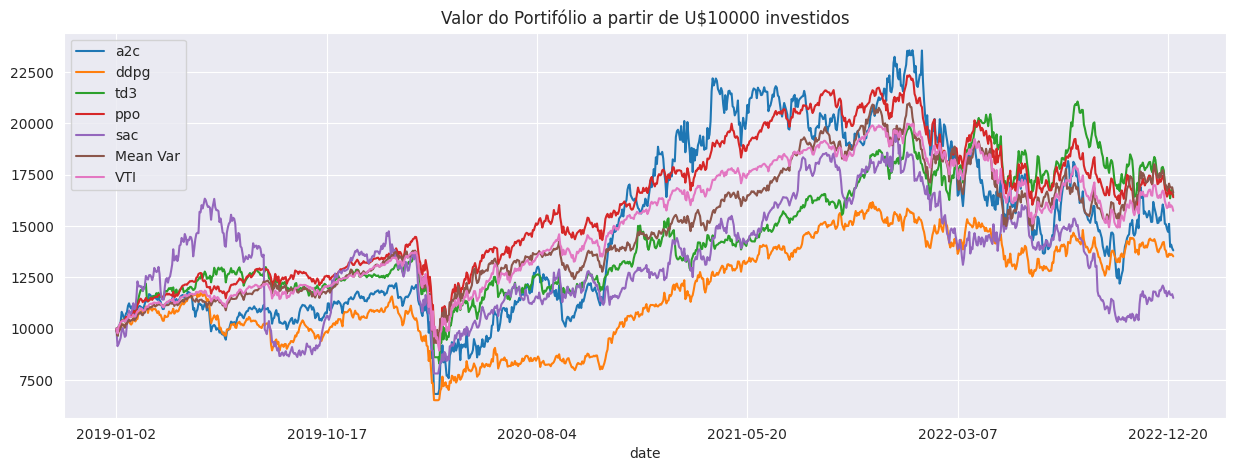

In [32]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
resultado.plot(title=f"Valor do Portifólio a partir de U${env_kwargs['initial_amount']} investidos");
plt.show()

Quantil p10 de a2c: 0.32
Quantil p25 de a2c: 0.53
Quantil p50 de a2c: 0.96
Quantil p75 de a2c: 1.71
Quantil p90 de a2c: 2.85

Quantil p10 de ddpg: 0.54
Quantil p25 de ddpg: 0.77
Quantil p50 de ddpg: 1.13
Quantil p75 de ddpg: 1.68
Quantil p90 de ddpg: 2.39

Quantil p10 de td3: 0.66
Quantil p25 de td3: 0.95
Quantil p50 de td3: 1.38
Quantil p75 de td3: 2.06
Quantil p90 de td3: 2.92

Quantil p10 de ppo: 0.76
Quantil p25 de ppo: 1.03
Quantil p50 de ppo: 1.45
Quantil p75 de ppo: 2.04
Quantil p90 de ppo: 2.74

Quantil p10 de sac: 0.31
Quantil p25 de sac: 0.50
Quantil p50 de sac: 0.84
Quantil p75 de sac: 1.44
Quantil p90 de sac: 2.32

O melhor modelo é: ppo

O Valor Final do melhor modelo é: 1.64



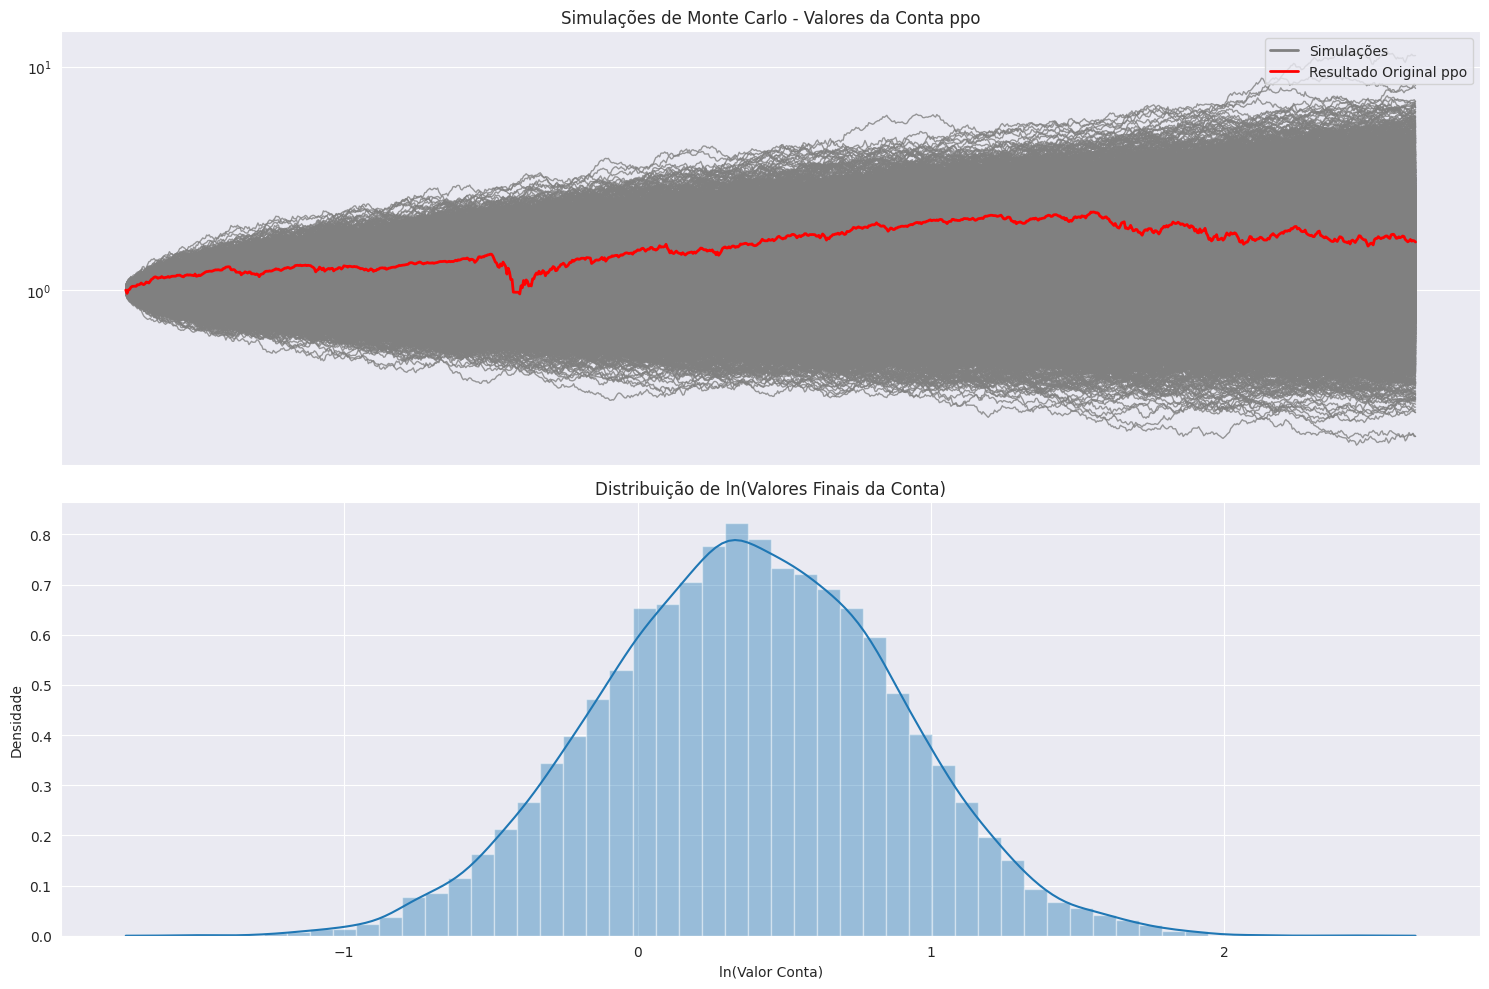

In [33]:
melhor_modelo = None

def monte_carlo(iteracoes):
    global melhor_modelo

    nomes_modelos = ['a2c', 'ddpg', 'td3', 'ppo', 'sac']
    melhor_desempenho = float('-inf')
    melhor_model = nomes_modelos[0]
    melhor_valores_conta = None

    for nome_modelo in nomes_modelos:
        num_datas = len(resultado[nome_modelo])
        valores_conta = np.ones((num_datas, iteracoes))
        retornos_log = np.log(1 + resultado[nome_modelo].pct_change())

        u = retornos_log.mean()
        var = retornos_log.var()
        drift = u - (0.5 * var)
        stdev = retornos_log.std()

        for i in range(iteracoes):
            valor_conta = 1.0

            retornos_diarios = np.exp(drift + stdev * norm.ppf(np.random.rand(num_datas)))

            for t in range(num_datas):
                if valor_conta <= 0:
                    valor_conta = 0
                valor_conta *= retornos_diarios[t]
                valores_conta[t, i] = valor_conta

        quantiles = np.percentile(valores_conta[-1], [10, 25, 50, 75, 90])

        if quantiles[2] > melhor_desempenho:  # Compara com a mediana (p50)
            melhor_desempenho = quantiles[2]
            melhor_model = nome_modelo
            melhor_valores_conta = valores_conta

        print(f"Quantil p10 de {nome_modelo}: {quantiles[0]:.2f}")
        print(f"Quantil p25 de {nome_modelo}: {quantiles[1]:.2f}")
        print(f"Quantil p50 de {nome_modelo}: {quantiles[2]:.2f}")
        print(f"Quantil p75 de {nome_modelo}: {quantiles[3]:.2f}")
        print(f"Quantil p90 de {nome_modelo}: {quantiles[4]:.2f}\n")

    melhor_modelo = melhor_model

    nome_modelo = melhor_modelo
    valores_conta = melhor_valores_conta
    num_datas = len(resultado[nome_modelo])
    escalada_linha = np.exp(np.log(resultado[nome_modelo]) - np.log(resultado[nome_modelo][0]))

    print(f"O melhor modelo é: {melhor_modelo}\n")
    print(f"O Valor Final do melhor modelo é: {escalada_linha[-1]:.2f}\n")

    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    for i in range(valores_conta.shape[1]):
        axes[0].plot(
            resultado.index,
            valores_conta[:, i],
            lw=1,
            alpha=0.8,
            color='gray',
        )

    axes[0].plot(resultado.index, escalada_linha, lw=2, color='red')
    axes[0].set_xlabel('')
    axes[0].set_title(f'Simulações de Monte Carlo - Valores da Conta {nome_modelo}')

    axes[0].set_xticks([])

    legenda_personalizada = [plt.Line2D([0], [0], color='gray', lw=2, label='Simulações'),
                            plt.Line2D([0], [0], color='red', lw=2, label=f'Resultado Original {nome_modelo}')]

    axes[0].legend(handles=legenda_personalizada, loc='upper right')

    axes[0].set_yscale('log')

    sns.distplot(np.log(valores_conta[-1]), ax=axes[1])
    axes[1].set_xlabel('ln(Valor Conta)')
    axes[1].set_ylabel('Densidade')
    axes[1].set_title('Distribuição de ln(Valores Finais da Conta)')
    plt.tight_layout()

    plt.show()

monte_carlo(iteracoes=10000)

In [34]:
def metricas():
    modelo_name = 'df_actions_' + melhor_modelo
    if modelo_name in globals():
        df2 = globals()[modelo_name]
        df2.index = pd.to_datetime(df2.index)

    holding_times = {}
    posicao_atual = {}
    for acao in df2.columns:
        if acao != 'YearMonth':
            holding_times[acao] = []
            posicao_atual[acao] = None

    for data, linha in df2.iterrows():
        for acao in df2.columns:
            if acao != 'YearMonth':
                acao_tomada = linha[acao]
                if acao_tomada == 0:
                    if posicao_atual[acao] is not None:
                        periodo_de_possao = (data - posicao_atual[acao]).days
                        holding_times[acao].append(periodo_de_possao)
                elif acao_tomada == 1 or acao_tomada == -1:
                    posicao_atual[acao] = data

    mean_holding_times = {acao: sum(tempos) / len(tempos) if tempos else 0 for acao, tempos in holding_times.items() if acao != 'YearMonth'}

    df2['YearMonth'] = df2.index.strftime('%Y-%m')
    negociacoes_mensais = df2[df2.isin([-1, 1]).any(axis=1)].groupby('YearMonth').size()

    media_negociacoes_mensais = negociacoes_mensais.mean()

    print(f"Tempo Médio de Holding: {round((sum(list(mean_holding_times.values())) / len(list(mean_holding_times.values())))/30, 2)} meses\n")
    for acao, holding_time in mean_holding_times.items():
        if holding_time != 0:
            print(f"{acao}: {holding_time:.2f} dias")

    print(f"\nMédia Mensal do Número de Negociações da Carteira: {media_negociacoes_mensais:.2f}")

metricas()

Tempo Médio de Holding: 1.12 meses

ETD: 503.50 dias
FAST: 504.05 dias
HVT: 417.80 dias
JKHY: 504.05 dias
LMAT: 416.47 dias
NRC: 500.84 dias

Média Mensal do Número de Negociações da Carteira: 3.67


In [35]:
print("==============Resultado Backtest===========")

modelo_nome_source = 'df_account_value_' + melhor_modelo
if modelo_nome_source in globals():
    perf_stats = backtest_stats(account_value=globals()[modelo_nome_source])
    perf_stats = pd.DataFrame(perf_stats)

==============Resultado Backtest===========
Annual return          0.132014
Cumulative returns     0.640513
Annual volatility      0.247498
Sharpe ratio           0.626003
Calmar ratio           0.392610
Stability              0.678851
Max drawdown          -0.336247
Omega ratio            1.119236
Sortino ratio          0.868415
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.886323
Daily value at risk   -0.030567
dtype: float64


In [36]:
print("==============Resultado Benchmark===========")

benchmark_df = get_baseline(
    ticker="VTI",
    start=globals()[modelo_nome_source].iloc[0, 0],
    end=globals()[modelo_nome_source].iloc[len(globals()[modelo_nome_source]) - 1, 0])

stats = backtest_stats(benchmark_df, value_col_name='close')

==============Resultado Benchmark===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1005, 8)
Annual return          0.124048
Cumulative returns     0.594171
Annual volatility      0.231546
Sharpe ratio           0.622010
Calmar ratio           0.354420
Stability              0.702949
Max drawdown          -0.350003
Omega ratio            1.126715
Sortino ratio          0.861247
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.874933
Daily value at risk   -0.028601
dtype: float64


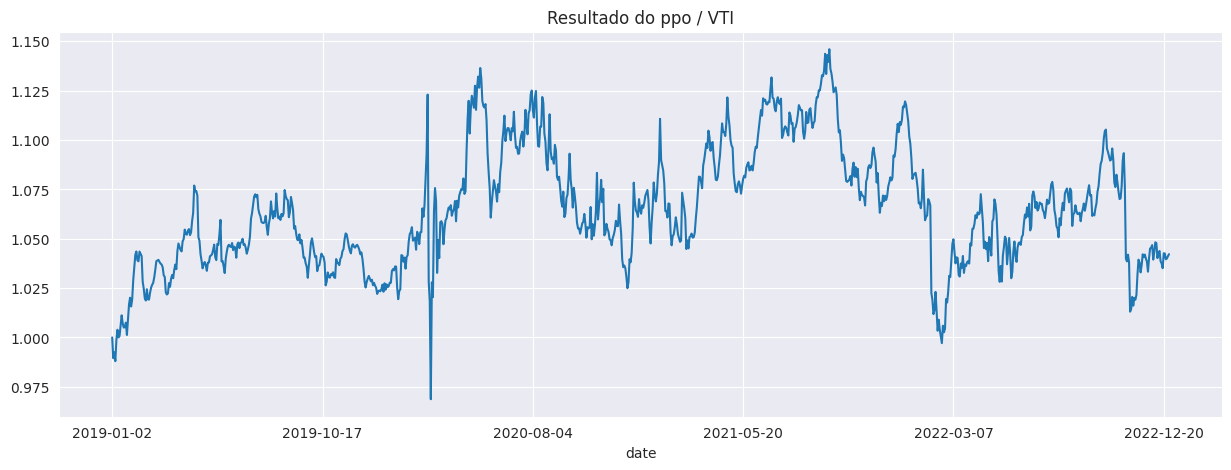

In [37]:
modelo_nome_result = 'df_result_' + melhor_modelo
if modelo_nome_result in globals():
    teste = globals()[modelo_nome_result][melhor_modelo] / df_vti["VTI"]
    teste.plot(title=f"Resultado do {melhor_modelo} / VTI")
    plt.show()

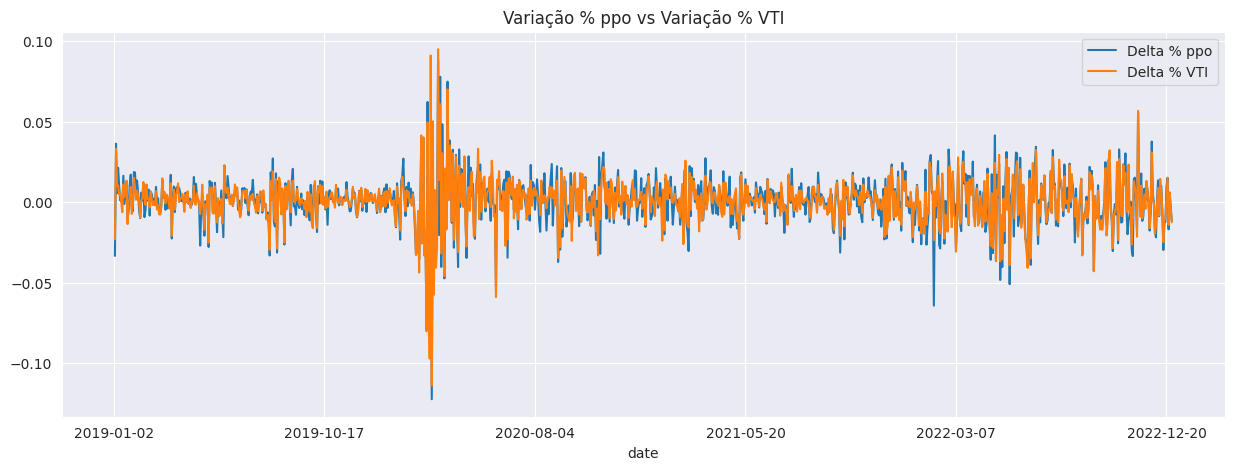

In [38]:
modelo_nome_result = 'df_result_' + melhor_modelo
if modelo_nome_result in globals():
    teste = globals()[modelo_nome_result][melhor_modelo]
    plt.figure()
    teste.pct_change().plot(label=f"Delta % {melhor_modelo}")
    df_vti["VTI"].pct_change().plot(label="Delta % VTI")
    plt.title(f"Variação % {melhor_modelo} vs Variação % VTI")
    plt.legend()
    plt.show()